# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (или $ \$\$ \quad\$\$ $).


### Criteria (50 points total):
* Task 1 (17 points)

    * Requested formulas are provided - 4 points
    * All 18 necessary experiments are done - 6 points
    * Results are analysed with commentaries - 7 points
* Tasks 2.1 и 2.2 (16 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 2 points
    * Results are analysed with commentaries - 4 points
* Task 3 (13 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 4 points
    * Data was aggregated properly - 2 points
    * Results are analysed with commentaries - 5 points
* Extra points:

    * 4 points in case clear, "pythonic" and understandable code style.

Good work: 40+ points.

In [433]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

# <<<All the imports here>>>
import itertools

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to shares;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance for the average value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* Repeat this for these sample sizes: 40 and 500;
* Also a single experiment is repeated 1000 times;

Thus, total number of experiments will be equal to 18 (3 methods of sampling \* 3 cases of distribution parameters \* 2 sample sizes).  

**Example**: you conduct an experiment for random sample method with equal ME and variance of stata. For each strata you sample the data with size equal to 40 and estimate the statistics 1000 times. Thus, now you can average the results or plot boxplots (we suggest you do this) to compare the point estimations for each strata. Then you repeat this for sample size equal to 500. And then you can conduct the same pipeline for different sampling methods.  

Define the parameters of normal distributions, fractions and size of the subsample yourself.
To facilitate the structuring of the code, you can draw up your solution using the specified class:

## The formulas for point estimates of the mathematical expectation and variance for the average value 

### Random selection from the entire population

The samples can be drawn in two possible ways. 

- The sampling units are chosen without replacement in the sense that the units once are chosen are not placed back in the population. 
- The sampling units are chosen with replacement in the sense that the chosen units are placed back in the population. 



So, sample mean, which is expected value of discrete random variable with same probality :
$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_1$$
The expected value of $\bar{X}$
$$E(\bar{X}) = \mu$$
and the variance of $\bar{X}$ is 
$$D(\bar{X}) = \sigma^2/n$$
and sample variance:
$$s^2 = \frac{1}{N-1}\sum^N_{i=1}(x_i - \bar{x})^2$$
Using the formula with $N-1$ gives us a sample variance, which on average, is equal to the unknown population variance

### Random selection of strata in proportion to shares

$$\xi \sim F(x) = W_1F_1(x)+ \cdots + W_LF_L(x)$$ 
$$W_k - strata's \ ratio - W_k = \frac{N_h}{N}$$

$$k = \overline{1,L}$$

With the $k_{th}$ strata let's take a sample of volume $n_k$:
$$(X_{1k}, \cdots , X_{n_{k}k}), k = \overline{1, L}$$


Sample mean:
$$\bar{X}_k = \frac{1}{n_k}\sum_{i=1}^{n_k}X_{ik}$$

Since $\mu = \sum^L_{k=1}W_k\mu_k$, the natural estimate of $\mu$ is
$$\bar{X}^*_n = \sum^L_{k=1}W_k\bar{X}^{(k)}_{n_k}$$

$\bar{X}^*_n$ is an unbiased wstimate of $\mu$
$$E(\bar{X}^*_n) = \mu$$

Under stratified random sampling
$$D(\bar{X}^*_n) = \sum^L_{k=1}W^2_k\frac{\sigma^2_k}{n_k}(1 - \frac{n_k - 1}{N_k -1})$$

If the sampling fractions within each stratum are small, i.e $n_k/N_k << 1$, then
$$D(\bar{X}^*_n) \approx \sum^L_{k=1}W^2_k\frac{\sigma^2_{k}}{n_k}$$

### Random selection according to the optimal sub-sampling.

Neyman allocation scheme minimizes variance $V[\bar{X}^*_n]$ subject to $\sum^N_{k=1}n_k = n$

Optimization problem:

$$D(\bar{X}^*_{n}) \rightarrow \min \ s.t.\sum^L_{k=1}n_k = n$$

So the sample size $n_1, \cdots , n_L$ that solve the optimization problem above are given by

$$n_k = n\frac{W_k\sigma_k}{\sum^L_{j=1} W_j \sigma_j}, \ k=1,...,L$$

If Neyman (i.e. optimal) allocation is used ($n_k = \hat{n_k}$), then the otimal stratified estimate of $\mu$, denoted by $\overline{X}^{*}_{n,opt}$ is
$$\overline{X}^{*}_{n, opt} = \sum^{L}_{k=1}W_k\overline{X}^{(k)}_{\hat{n_k}}$$

The variance of the optimal stratified estimate is
$$D(\bar{X}^*_{n,opt}) = \frac{1}{n}(\sum^L_{k=1}W_k\sigma_k)^2$$

So, extepted value of the avetage 
$$E(\bar{X}^*_n) = \mu$$

In [490]:
class Experiment:

    def __init__(self, means, stds, random_state=42):
        """Initializes our experiment and saves the given distributions
        
        :param means: List of expectations for normal distributions
        :param stds: List of standard deviations for normal distributions
        :param random_state: Parameter fixing randomness. Needed so that when conducting
        experiment repeatedly with the same input parameters, the results remained the same
        """
        self.means = means
        self.stds = stds
        self.random_state = random_state
        self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    
    def sample(self, sizes):
        """Creates a population sample
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.sizes = sizes
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, self.sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        self.mean = np.mean(self.general_samples)
        self.var = np.var(self.general_samples)
        

    def random_subsampling(self, size):
        """Creates a random subset of the entire population
        
        :param sizes: subsample size
        """
        random_ss = np.random.choice(self.general_samples, size=size)
        random_mean = np.mean(random_ss)
        return random_mean

    def proportional_subsampling(self, size):
        """Creates a subsample with the number of elements, proportional shares of strata
        
        :param sizes: subsample size
        """
        mds = []
        for d in self.strats_samples:
            strat_size = (round(size/self.N * np.count_nonzero(d)))
            strat_random =  np.random.choice(d, size=strat_size, replace=False)
            mds.append(np.mean(strat_random) * strat_size)
        strati_mean = np.sum(mds) / size
        return strati_mean
    
      
    def optimal_subsampling(self, size):
        """Creates a subsample with the optimal number of elements relative to strata
        
        :param sizes: subsample size
        """
        w_all = [d.shape[0] / self.N for d in self.strats_samples]
        optim = []
        optim_mds = []
        for d, w, std in zip(self.strats_samples, w_all, self.stds):
            optim_size = round(size * (w *std) / np.sum([x * y for x,y in zip(w_all, self.stds)]))
            strat_random =  np.random.choice(d, size=optim_size, replace=False)
            optim_mds.append(np.mean(strat_random) * optim_size)
        optim_mean = np.sum(optim_mds) / size   
        return optim_mean    
        
 
    
    
    def run_experiments(self, subsampling_method, n_experiments=1000):
        """Conducts a series of experiments and saves the results
        
        :param subsampling_method: method for creating a subsample
        :param n_experiments: number of experiment starts
        """
        s = min(self.sizes) * 0.75
        
        if subsampling_method == 0:
            sampling = self.random_subsampling
        elif subsampling_method == 1:
            sampling = self.proportional_subsampling
        elif subsampling_method == 2:
            sampling = self.optimal_subsampling
        else:
            print('Unexpected Error')
        
        mean_array = []
        for _ in range(n_experiments):
            mean_array.append(sampling(round(s)))
        return mean_array

In [530]:
def mean_and_variance(data):
    for index ,elem in list(enumerate(data)):
        print(f'sampling type - {index}, mean - {np.mean(elem)}, variance - {np.var(elem)}')

Tupple values of the sampling type

In [491]:
exp_sample_type = ([0, 1, 2])

### Experiment 1, same std but different mean,  sample size = 40

In [526]:
experiment_1 = Experiment([1, 6, -4], [1, 1, 1])
experiment_1.sample([7, 15, 18])

In [527]:
mean_1 = []

for est in exp_sample_type:
    mean_1.append(experiment_1.run_experiments(est))

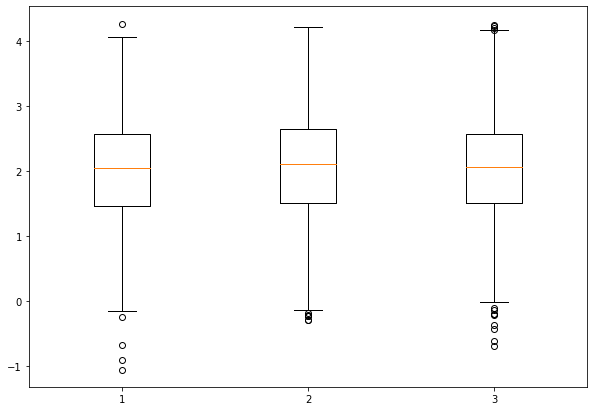

In [528]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(mean) 
  
# show plot 
plt.show() 

In [531]:
mean_and_variance(mean_1)

sampling type - 0, mean - 0.4755072251193831, variance - 4.050785885934247
sampling type - 1, mean - 0.7541165276177837, variance - 0.16648189101798824
sampling type - 2, mean - 0.7590232490849763, variance - 0.14905474361554316


### Experiment 1, same mean but different stds,  sample size = 40

In [532]:
experiment_2 = Experiment([2, 2, 2], [3, 1, 2])
experiment_2.sample([7, 15, 18])

In [533]:
mean_2 = []

for est in exp_sample_type:
    mean_2.append(experiment_2.run_experiments(est))

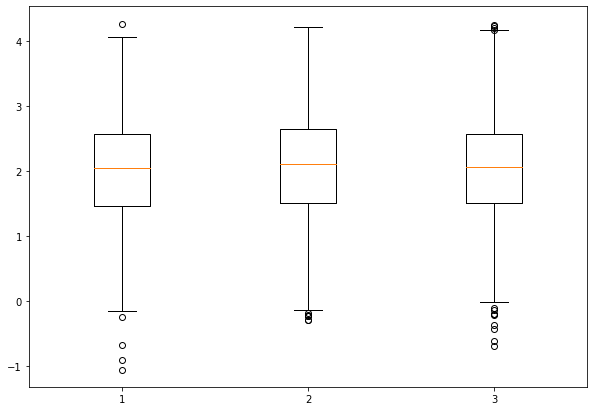

In [534]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(mean) 
  
# show plot 
plt.show() 

In [535]:
mean_and_variance(mean_2)

sampling type - 0, mean - 1.8214792194148737, variance - 0.7279138414388527
sampling type - 1, mean - 1.8141882402739522, variance - 0.7003404375634472
sampling type - 2, mean - 1.7043433891122095, variance - 0.8422921209375351


### Experiment 3, same mean same stds,  sample size = 40

In [536]:
experiment_3 = Experiment([2, 2, 2], [1, 1, 1])
experiment_3.sample([7, 15, 18])

In [537]:
mean_3 = []

for est in exp_sample_type:
    mean_3.append(experiment_3.run_experiments(est))

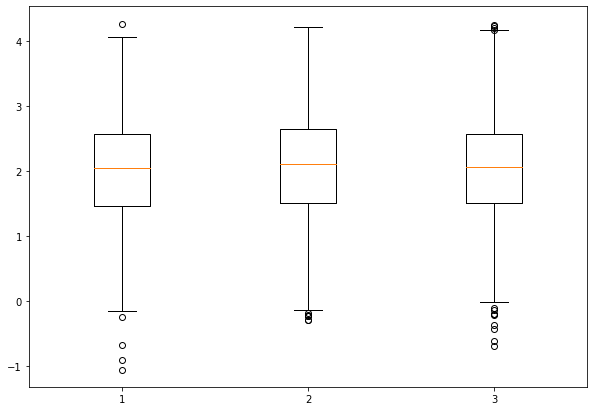

In [538]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(mean) 
  
# show plot 
plt.show() 

In [539]:
mean_and_variance(mean_3)

sampling type - 0, mean - 1.7725205277448903, variance - 0.26689246402074474
sampling type - 1, mean - 1.7716670563567822, variance - 0.25635776476770794
sampling type - 2, mean - 1.7975312572444413, variance - 0.2448024116422263


### Experiment 4, same mean , different stds, sample size = 500

In [540]:
experiment_4 = Experiment([2, 2, 2], [3, 1, 2])
experiment_4.sample([359, 112, 247])

In [541]:
mean_4 = []

for est in exp_sample_type:
    mean_4.append(experiment_4.run_experiments(est))

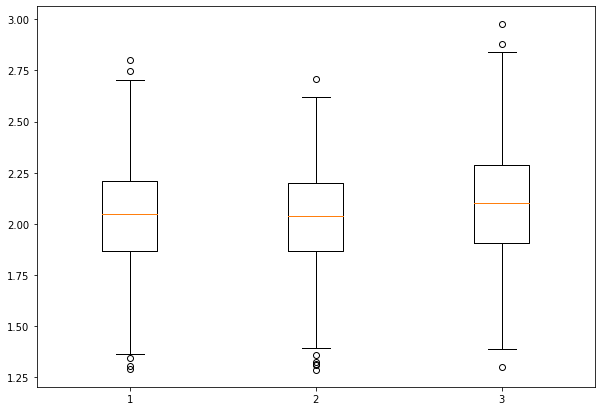

In [542]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(mean_4) 
  
# show plot 
plt.show() 

In [543]:
mean_and_variance(mean_4)

sampling type - 0, mean - 2.0367088322826183, variance - 0.06609697534031642
sampling type - 1, mean - 2.0299329506978876, variance - 0.061270454679625885
sampling type - 2, mean - 2.0961533510504267, variance - 0.07452308750930556


### Experiment 5 , same mean , same stds, sample size = 500

In [544]:
experiment_5 = Experiment([2, 2, 2], [1, 1, 1])
experiment_5.sample([359, 112, 247])

In [545]:
mean_5 = []

for est in exp_sample_type:
    mean_5.append(experiment_5.run_experiments(est))

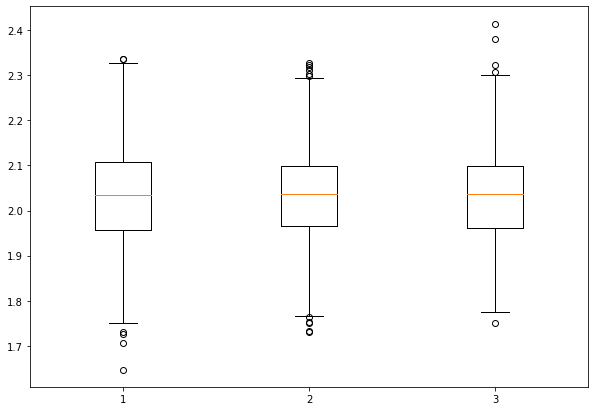

In [546]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(mean_5) 
  
# show plot 
plt.show() 

In [547]:
mean_and_variance(mean_5)

sampling type - 0, mean - 2.03156489816663, variance - 0.012034321149401603
sampling type - 1, mean - 2.0350138999142384, variance - 0.010444891620884075
sampling type - 2, mean - 2.029374921235131, variance - 0.010435226267176828


### Experiment 6 , different mean , same stds, sample size = 500

In [548]:
experiment_6 = Experiment([1, 6, -4], [1, 1, 1])
experiment_6.sample([359, 112, 247])

In [549]:
mean_6 = []

for est in exp_sample_type:
    mean_6.append(experiment_6.run_experiments(est))

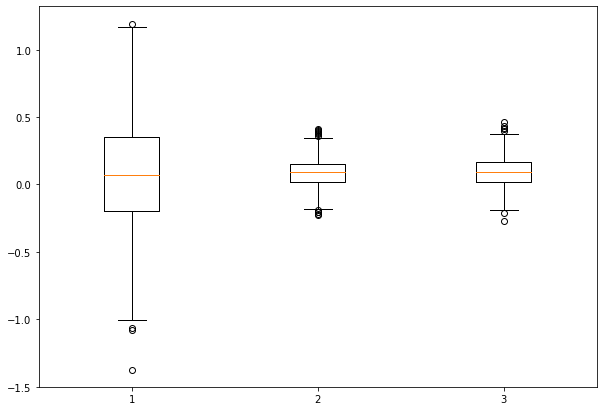

In [550]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(mean_6) 
  
# show plot 
plt.show() 

In [551]:
mean_and_variance(mean_6)

sampling type - 0, mean - 0.07555570714830373, variance - 0.16049219387772257
sampling type - 1, mean - 0.08708717752248449, variance - 0.011038208793131762
sampling type - 2, mean - 0.08946926526414459, variance - 0.01138596960274276


# Task 2

Data is here https://drive.google.com/drive/folders/1zlvCNV6zNY9i3KIiFM6McByEgPBn_y2w?usp=sharing

### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.

**Data is in `HW1_task2_brain_data.tsv`**

### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)

**Data is in `HW1_task2_car_prefs_data.tsv`**

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
# <<<YOUR CODE HERE>>>